# Тема “Обучение с учителем”


### Задание 1
Импортируйте библиотеки pandas и numpy.

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы x и y из этих данных.

Разбейте эти датафреймы на тренировочные (x_train, y_train) и тестовые (x_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.

Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.

Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.

Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.


In [147]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

In [148]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [149]:
x = pd.DataFrame(boston['data'], columns=boston['feature_names'])
#x

In [150]:
y = pd.DataFrame(boston['target'], columns=["price"])
#y.head(5)

In [151]:
from sklearn.model_selection import train_test_split

In [152]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=30, random_state=42)

In [153]:
from sklearn.linear_model import LinearRegression

In [154]:
lr = LinearRegression()

In [155]:
lr.fit(x_train, y_train)

LinearRegression()

In [156]:
y_pred = lr.predict(x_test)
y_pred[:5]

array([[29.21529199],
       [36.30339776],
       [14.03128563],
       [24.76168914],
       [18.72223064]])

In [157]:
from sklearn.metrics import r2_score

In [158]:
R2 = r2_score(y_test, y_pred)
R2_LR = np.round(R2, 2)
R2_LR

0.76

### Задание 2
Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.

Сделайте агрумент n_estimators равным 1000,
max_depth должен быть равен 12 и random_state сделайте равным 42.

Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression, но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0], чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.

Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.

Напишите в комментариях к коду, какая модель в данном случае работает лучше.


In [159]:
from sklearn.ensemble import RandomForestRegressor

In [160]:
model = RandomForestRegressor(n_estimators = 1000, max_depth = 12, random_state = 42)

In [161]:
model.fit(x_train, y_train.values[:, 0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

In [162]:
y_pred = model.predict(x_test)

In [163]:
R2 = r2_score(y_test, y_pred)
R2_RFR = np.round(R2, 2)
print("RandomForestRegressor - ", R2_RFR,'\n'"LinearRegression - ", R2_LR)

RandomForestRegressor -  0.93 
LinearRegression -  0.76


In [164]:
#Модель рандомного леса работает лучше: коэффициент детерминации 0,93 против 0,76 у линейной регриесии.

### *Задание 3
Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.

С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.


In [165]:
fi = model.feature_importances_
fi

array([0.03635835, 0.00101299, 0.00631642, 0.0007059 , 0.02214408,
       0.43243511, 0.01358783, 0.06849985, 0.00378938, 0.01535972,
       0.01698606, 0.01210385, 0.37070044])

In [166]:
#Сумма всех показателей важности
sum(fi)

1.0

In [167]:
#Список показателей
feature_importance = pd.DataFrame({'name':x.columns, 
                                   'feature_importance':model.feature_importances_}, 
                                  columns=['feature_importance', 'name'])
feature_importance

,feature_importance,name
0,0.036358,CRIM
1,0.001013,ZN
2,0.006316,INDUS
3,0.000706,CHAS
4,0.022144,NOX
5,0.432435,RM
6,0.013588,AGE
7,0.068500,DIS
8,0.003789,RAD
9,0.015360,TAX


In [168]:
#Наибольные два показателя

In [169]:
n_2 = feature_importance.nlargest(2, 'feature_importance')
n_2

,feature_importance,name
5,0.432435,RM
12,0.370700,LSTAT




---


## Дополнительное задание для работы с курсовым проектом:

(Необязательно выполнять, но очень желательно)

Скачать данные из соревнования. Считать их.

Разбейте датасет из train.csv на обучающий и валидационный наборы данных.

Заполните пропущенные значения в датасете медианами или модами.

Переведите строковый признак в числовое представление.

Обучите линейную модель. Посчитайте метрику R2 на двух наборах данных. Сделайте выводы.

Обучите более сложную модель на ваш выбор. Посчитайте метрику R2 на двух наборах данных. Сделайте выводы.

Подберите оптимальные гиперпараметры для вашей модели. Пытайтесь улучшить её качество на двух наборах данных.




In [170]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [171]:
#csv_path = 'Google Диск/Colab Notebooks/Real Estate Price Prediction/train/train.csv'
csv_path = 'Google Диск/Colab Notebooks/Real Estate Price Prediction/train/train.csv'
source_ds = pd.read_csv(csv_path)

In [172]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [173]:
#оптимизируем память
source_ds = reduce_mem_usage(source_ds)

Memory usage of dataframe is 1.53 MB
Memory usage after optimization is: 0.49 MB
Decreased by 68.1%


In [174]:
#Фичи с пропусками
source_ds['Id'].count()
source_ds.count()[source_ds.count() < source_ds['Id'].count()]

LifeSquare      7887
Healthcare_1    5202
dtype: int64

In [175]:
lf = source_ds['LifeSquare']
lf.head(5)

0          NaN
1    23.169222
2    47.671970
3          NaN
4    38.562515
Name: LifeSquare, dtype: float32

In [176]:
lf[lf.isna()] = lf.mean()

In [177]:
lf = source_ds['LifeSquare']
lf.head(5)

0    37.199646
1    23.169222
2    47.671970
3    37.199646
4    38.562515
Name: LifeSquare, dtype: float32

In [178]:
#Фичи с пропусками
source_ds['Id'].count()
source_ds.count()[source_ds.count() < source_ds['Id'].count()]

Healthcare_1    5202
dtype: int64

In [179]:
hc_1 = source_ds['Healthcare_1']
hc_1.head(5)

0       NaN
1    1183.0
2     240.0
3       NaN
4       NaN
Name: Healthcare_1, dtype: float32

In [180]:
hc_1[hc_1.isna()] = hc_1.mean()

In [181]:
hc_1[hc_1.isna()]

Series([], Name: Healthcare_1, dtype: float32)

In [182]:
#Фичи с пропусками
source_ds['Id'].count()
source_ds.count()[source_ds.count() < source_ds['Id'].count()]

Series([], dtype: int64)

Переведите строковый признак в числовое представление

In [183]:
source_ds.select_dtypes(include=['category']).head()
#train_ds.dtypes

,Ecology_2,Ecology_3,Shops_2
0,B,B,B
1,B,B,B
2,B,B,B
3,B,B,B
4,B,B,B


In [184]:
source_ds['Ecology_2'].value_counts(), source_ds['Ecology_3'].value_counts(), source_ds['Shops_2'].value_counts()

(B    9903
 A      97
 Name: Ecology_2, dtype: int64,
 B    9725
 A     275
 Name: Ecology_3, dtype: int64,
 B    9175
 A     825
 Name: Shops_2, dtype: int64)

In [185]:
source_ds['Ecology_2_int'] = 0
source_ds['Ecology_3_int'] = 0
source_ds['Shops_2_int'] = 0
source_ds['Ecology_2_int'] = source_ds['Ecology_2_int'].astype(np.int8)
source_ds['Ecology_3_int'] = source_ds['Ecology_3_int'].astype(np.int8)
source_ds['Shops_2_int'] = source_ds['Shops_2_int'].astype(np.int8)

source_ds.dtypes

Id                  int16
DistrictId          int16
Rooms             float32
Square            float32
LifeSquare        float32
KitchenSquare     float32
Floor                int8
HouseFloor        float32
HouseYear           int32
Ecology_1         float32
Ecology_2        category
Ecology_3        category
Social_1             int8
Social_2            int16
Social_3            int16
Healthcare_1      float32
Helthcare_2          int8
Shops_1              int8
Shops_2          category
Price             float32
Ecology_2_int        int8
Ecology_3_int        int8
Shops_2_int          int8
dtype: object

In [186]:
source_ds['Ecology_2_int'][source_ds['Ecology_2'] == 'B'] = 1
source_ds['Ecology_3_int'][source_ds['Ecology_3'] == 'B'] = 1
source_ds['Shops_2_int'][source_ds['Shops_2'] == 'B'] = 1

In [187]:
source_ds.dtypes 

Id                  int16
DistrictId          int16
Rooms             float32
Square            float32
LifeSquare        float32
KitchenSquare     float32
Floor                int8
HouseFloor        float32
HouseYear           int32
Ecology_1         float32
Ecology_2        category
Ecology_3        category
Social_1             int8
Social_2            int16
Social_3            int16
Healthcare_1      float32
Helthcare_2          int8
Shops_1              int8
Shops_2          category
Price             float32
Ecology_2_int        int8
Ecology_3_int        int8
Shops_2_int          int8
dtype: object

In [188]:
source_ds.drop(columns='Ecology_2', inplace=True)
source_ds.drop(columns='Ecology_3', inplace=True)
source_ds.drop(columns='Shops_2', inplace=True)


In [189]:
source_ds.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,Ecology_2_int,Ecology_3_int,Shops_2_int
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315777,37.199642,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904419,1.319500,4.231300,214138.859375,0.990300,0.972500,0.917500
std,4859.01902,43.587592,0.839512,21.058731,76.588745,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,736.734253,1.493601,4.806341,92872.289062,0.098015,0.163543,0.275139
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.777344,0.000000,0.000000,0.000000
25%,4169.50000,20.000000,1.000000,41.774879,25.527400,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,153872.628906,1.000000,1.000000,1.000000
50%,8394.50000,36.000000,2.000000,52.513309,37.199646,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,1142.904419,1.000000,3.000000,192269.648438,1.000000,1.000000,1.000000
75%,12592.50000,75.000000,2.000000,65.900627,41.427234,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1142.904419,2.000000,6.000000,249135.460938,1.000000,1.000000,1.000000
max,16798.00000,209.000000,19.000000,641.065186,7480.592285,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.437500,1.000000,1.000000,1.000000


Обучите линейную модель. Посчитайте метрику R2 на двух наборах данных. Сделайте выводы.

In [190]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [191]:
lr = LinearRegression()

In [192]:
train_ds, valid_ds = train_test_split(source_ds, test_size=0.5, random_state=0)

In [193]:
x = train_ds.drop(columns='Price')
y = train_ds['Price']

In [194]:
lr.fit(x, y)

LinearRegression()

In [195]:
y_pred = lr.predict(valid_ds.drop(columns='Price'))


In [196]:
R2_75 = r2_score(valid_ds['Price'], y_pred)
R2_75

0.48318926401363493

In [197]:
train_ds, valid_ds = train_test_split(source_ds, test_size=0.25, random_state=0)

In [198]:
x = train_ds.drop(columns='Price')
y = train_ds['Price']
lr.fit(x, y)
y_pred = lr.predict(valid_ds.drop(columns='Price'))

In [199]:
R2_25 = r2_score(valid_ds['Price'], y_pred)
R2_25

0.5174282552264007

In [200]:
print("test_size = 25% -", np.round(R2_25, 2),'\n'"test_size = 50% -", np.round(R2_75, 2))
'При доле тестовой выборки 25% предсказание точнее чем при значении 50%'

test_size = 25% - 0.52 
test_size = 50% - 0.48


'При доле тестовой выборки 25% предсказание точнее чем при значении 50%'

In [201]:
t_values = np.arange(0.01, 1, 0.01)

r2_on_train = []

for i, value in enumerate(t_values):
    train_ds, valid_ds = train_test_split(source_ds, test_size=value, random_state=0)
    lr.fit(train_ds.drop(columns='Price'), train_ds['Price'])
    y_pred = lr.predict(valid_ds.drop(columns='Price'))
       
    r2_train = r2_score(valid_ds['Price'], y_pred)
   
    r2_on_train.append(r2_train)
#r2_on_train

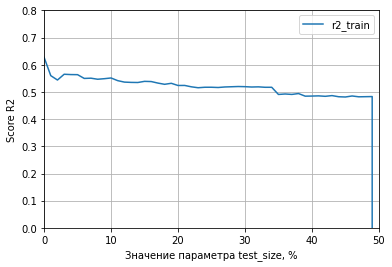

In [202]:
# посмотрим общий график зависимости R2 от размера тестовой выборки
from matplotlib import pyplot as plt
plt.plot(r2_on_train, label="r2_train")
plt.xlabel('Значение параметра test_size, %')
plt.ylabel('Score R2')
plt.ylim(0.0, 0.8)
plt.xlim(00, 50)

plt.legend()
plt.grid()

plt.show()

Оптимальным тестовым размером выборки является 5%

In [203]:
train_ds, valid_ds = train_test_split(source_ds, test_size=0.05, random_state=0)
x = train_ds.drop(columns='Price')
y = train_ds['Price']
lr.fit(x, y)
y_pred = lr.predict(valid_ds.drop(columns='Price'))
R2_05 = r2_score(valid_ds['Price'], y_pred)
print("test_size = 5%\nR2 =", np.round(R2_05, 2))

test_size = 5%
R2 = 0.56


Применим случайный лес деревьев

In [204]:
from sklearn.ensemble import RandomForestRegressor
from dask.distributed import Client
import joblib
client = Client(processes=False) 

In [205]:
# найдем наилучше параметры
from sklearn.model_selection import GridSearchCV

In [223]:
#Зададим сетку параметров, по которой мы хотели бы провести поиск:
parameters = {
    'n_estimators': np.arange(10, 100, 10),
    'max_features': np.arange(6, 10, 2),
    'max_depth': np.arange(10, 100, 10),
}

clf = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=parameters,
    scoring='r2',
    cv=5
)

In [207]:
# получаем тестовую выборку 5%
train_ds, valid_ds = train_test_split(source_ds, test_size=0.05, random_state=0)
x_train_ds = train_ds.drop(columns='Price')
y_train_ds = train_ds['Price']
x_valid_ds = valid_ds.drop(columns='Price')
y_valid_ds = valid_ds['Price']

In [208]:
with joblib.parallel_backend('dask'):
    clf.fit(x_train_ds, y_train_ds)

In [209]:
cv_results = pd.DataFrame(clf.cv_results_)
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_features', 'param_n_estimators', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score'],
      dtype='object')

In [210]:
# Посмотрим, как выбранные нами параметры влияют на точность модели:
param_columns = [
    column
    for column in cv_results.columns
    if column.startswith('param_')
]

score_columns = ['mean_test_score', 'rank_test_score']

cv_results[param_columns + score_columns].sort_values(by=score_columns, ascending=False)

cv_results.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.367655,0.765716,0.054191,0.031819,10,6,10,"{'max_depth': 10, 'max_features': 6, 'n_estima...",0.708394,0.728129,0.675820,0.708790,0.703716,0.704970,0.016816,160
1,2.610570,0.359273,0.081132,0.018396,10,6,20,"{'max_depth': 10, 'max_features': 6, 'n_estima...",0.710565,0.740611,0.692197,0.717148,0.712916,0.714687,0.015518,144
2,4.247266,0.247799,0.160711,0.072922,10,6,30,"{'max_depth': 10, 'max_features': 6, 'n_estima...",0.712349,0.738517,0.696715,0.722297,0.731075,0.720191,0.014638,138
3,4.259768,0.156685,0.229590,0.064304,10,6,40,"{'max_depth': 10, 'max_features': 6, 'n_estima...",0.709040,0.741173,0.701868,0.718813,0.721549,0.718489,0.013338,141
4,5.653089,0.334672,0.199840,0.088653,10,6,50,"{'max_depth': 10, 'max_features': 6, 'n_estima...",0.715569,0.737063,0.698120,0.721347,0.729907,0.720401,0.013332,137


In [211]:
clf.best_params_

{'max_depth': 20, 'max_features': 6, 'n_estimators': 80}

In [213]:
clf = RandomForestRegressor(max_depth=20, max_features=6, n_estimators=80)

clf.fit(x_train_ds, y_train_ds)

y_pred = clf.predict(x_valid_ds)

R2_RFR = r2_score(y_valid_ds, y_pred)

print("LR test_size = 5% R2 =", np.round(R2_05, 3),'\n'
      "RFR R2 =", np.round(R2_RFR, 3))

LR test_size = 5% R2 = 0.564 
RFR R2 = 0.803


In [145]:
Лучшими параметарами для регресии случайных деревьев являются max_depth=20, max_features=6, n_estimators=80

In [224]:
# зададим тестовую выборку 10% и random_state=42
train_ds, valid_ds = train_test_split(source_ds, test_size=0.1, random_state=42)
x_train_ds = train_ds.drop(columns='Price')
y_train_ds = train_ds['Price']
x_valid_ds = valid_ds.drop(columns='Price')
y_valid_ds = valid_ds['Price']

clf = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=parameters,
    scoring='r2',
    cv=5)

In [225]:
with joblib.parallel_backend('dask'):
    clf.fit(x_train_ds, y_train_ds)

In [226]:
clf.best_params_

{'max_depth': 70, 'max_features': 8, 'n_estimators': 50}

In [227]:
clf = RandomForestRegressor(max_depth=70, max_features=8, n_estimators=50)

clf.fit(x_train_ds, y_train_ds)

y_pred = clf.predict(x_valid_ds)

R2_RFR = r2_score(y_valid_ds, y_pred)

print("LR test_size = 5% R2 =", np.round(R2_05, 3),'\n'
      "RFR R2 =", np.round(R2_RFR, 3))

LR test_size = 5% R2 = 0.564 
RFR R2 = 0.74


При большей тестовой выборке, качество регрессии падает R2 10% = 0.74, R2 5% = 0.803